In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("dataset/train.csv")
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
t_data = data.drop(["label"],axis = 1)
t_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
t_data = np.matrix(t_data)/255
mu, sigma = 0, 0.1 
noise = np.random.normal(mu, sigma, [len(t_data),784])
n_data = t_data + noise

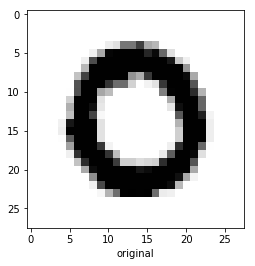

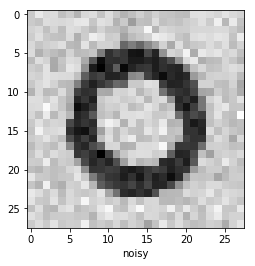

In [5]:
tmp = t_data[1]
tmp.shape = (28,28)
plt.imshow(255-tmp,cmap='gray')
plt.xlabel('original')
plt.show()

tmp = n_data[1]
tmp.shape = (28,28)
plt.imshow(255-tmp,cmap='gray')
plt.xlabel('noisy')
plt.show()

In [6]:
X_train = n_data[:30000]
y_train = t_data[:30000]
X_test = n_data[30000:]
y_test = t_data[30000:]

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten

model = Sequential()
model.add(Flatten())
model.add(Dense(300))
model.add(Activation("relu"))
model.add(Dense(150))
model.add(Activation("relu"))
model.add(Dense(300))
model.add(Activation("relu"))
model.add(Dense(784))
model.add(Activation("sigmoid"))
#model.add(Dropout(0.2))
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.1)

Train on 27000 samples, validate on 3000 samples
Epoch 1/10
27000/27000 [==============================] - 16s 609us/sample - loss: 0.1345 - acc: 0.8073 - val_loss: 0.0963 - val_acc: 0.8123
Epoch 2/10
27000/27000 [==============================] - 16s 585us/sample - loss: 0.0891 - acc: 0.8142 - val_loss: 0.0858 - val_acc: 0.8131
Epoch 3/10
27000/27000 [==============================] - 16s 588us/sample - loss: 0.0827 - acc: 0.8147 - val_loss: 0.0817 - val_acc: 0.8133
Epoch 4/10
27000/27000 [==============================] - 16s 588us/sample - loss: 0.0795 - acc: 0.8149 - val_loss: 0.0796 - val_acc: 0.8134
Epoch 5/10
27000/27000 [==============================] - 16s 599us/sample - loss: 0.0775 - acc: 0.8150 - val_loss: 0.0780 - val_acc: 0.8135
Epoch 6/10
27000/27000 [==============================] - 17s 632us/sample - loss: 0.0762 - acc: 0.8150 - val_loss: 0.0775 - val_acc: 0.8135
Epoch 7/10
27000/27000 [==============================] - 16s 608us/sample - loss: 0.0753 - acc: 0.8151 -

In [14]:
val_loss, val_accuracy = model.evaluate(X_test, y_test)

12000/12000 [==============================] - 2s 158us/sample - loss: 0.0749 - acc: 0.8154


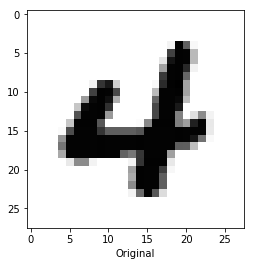

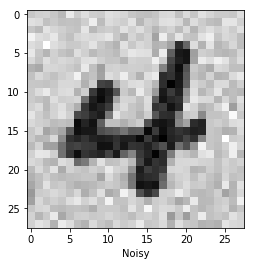

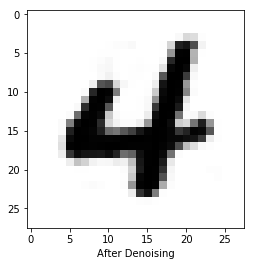

In [16]:
tmp = y_test[5]
tmp.shape = (28,28)
plt.imshow(255-tmp,cmap='gray')
plt.xlabel('Original')
plt.show()

tmp = X_test[5]
tmp.shape = (28,28)
plt.imshow(255-tmp,cmap='gray')
plt.xlabel('Noisy')
plt.show()

prediction = model.predict([[tmp]])
prediction.shape = (28,28)
plt.imshow(255-prediction,cmap='gray')
plt.xlabel('After Denoising')
plt.show()